In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

A = np.array([[0.9512, 0],
              [0.0476, 0.9512]], ndmin = 2)
B = np.array([[1], [2]], ndmin = 2)
C = np.array([0, 1], ndmin = 2)

mean_w = np.array([[0], [0]], ndmin = 2)
Q = 1e-3 * np.array([[9.506, 0.234],
                              [0.234, 9.512]], ndmin = 2)
mean_v = 0
R = 0.0125

h = 0.1 # sampling period in second

mu_0 = np.array([[5], [5]], ndmin = 2)
P_0 = np.array([[1, 0],
                        [0, 1]], ndmin = 2)


u = np.loadtxt("./Data_linear_case/input_linear_case.txt", skiprows = 1, usecols = 0)
y = np.loadtxt("./Data_linear_case/Measured_output_linear_case.txt", skiprows = 1, usecols = 0)
true_x1 = np.loadtxt("./Data_linear_case/True_state_x1_linear_case.txt", skiprows = 1, usecols = 0)
true_x2 = np.loadtxt("./Data_linear_case/True_state_x2_linear_case.txt", skiprows = 1, usecols = 0)

assert len(u) == len(y) == len(true_x1) == len(true_x2)

number_step_max = len(u)


# Forecast step

In [32]:
def forecast_KF(mu_k_1, u_k, P_k_1, Q):
    mu_tilde = A@mu_k_1 + B*u_k
    P_tilde_k = A@P_k_1@A.T + Q
    return mu_tilde, P_tilde_k

def update_KF(P_tilde_k, C, R, mu_tilde_k, y_k):
    K_k = P_tilde_k@C.T@np.linalg.inv(C@P_tilde_k@C.T + R)
    mu_k = mu_tilde_k + K_k@(y_k - C@mu_tilde_k)
    P_k = (np.identity(len(P_tilde_k)) - K_k@C)@P_tilde_k
    return mu_k,P_k

In [33]:
mu = pd.DataFrame(columns = ["mu_x1", "mu_x2"])
P = pd.DataFrame(columns = ["x1x1", "x1x2", "x2x1", "x2x2"])

mu.loc[0] = mu_0.flatten().tolist()
P.loc[0] = P_0.flatten().tolist()

mu_k_1 = mu_0
P_k_1 = P_0

for i in range(number_step_max):
    mu_tilde_k, P_tilde_k = forecast_KF(mu_k_1, u[i], P_k_1, Q)
    mu_k_1, P_k_1 = update_KF(P_tilde_k, C, R, mu_tilde_k, y[i])
    mu.loc[i+1] = mu_k_1.flatten().tolist()
    P.loc[i+1] = P_k_1.flatten().tolist()

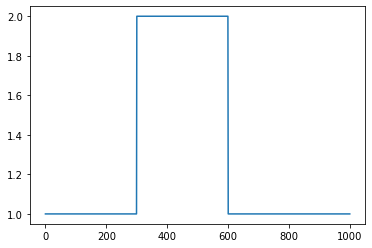

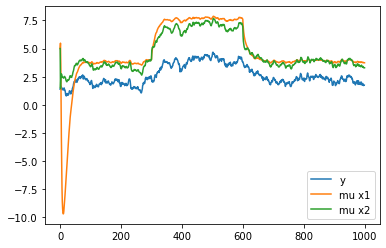

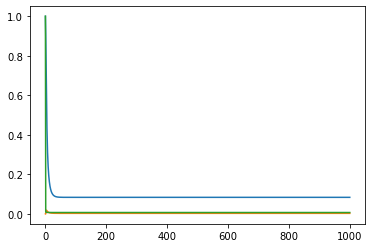

In [36]:
plt.figure()
plt.plot(u)
plt.show()

plt.figure()
plt.plot(y)
plt.plot(mu["mu_x1"])
plt.plot(mu["mu_x2"])
plt.legend(["y", "mu x1", "mu x2"])
plt.show()

plt.figure()
plt.plot(P["x1x1"])
plt.plot(P["x1x2"])
plt.plot(P["x2x2"])
plt.show()

# Update step